In [1]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Search for best hyperparameters using GridSearchCV and RandomForestRegressor

In [2]:
cars = pd.read_csv("final_cars.csv")

In [3]:
## create X and Y
y = cars['price']
X = cars.drop(columns=['price'])

In [4]:
X = pd.get_dummies(X)

In [5]:
X.shape

(201, 38)

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#### Set aside some data for testing

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [8]:
model = RandomForestRegressor()
params_grid  = [{'n_estimators' : [10, 20, 30, 50] , 'max_depth' :[2, 3, 4, 8, 10]}]

In [9]:
grid_search = GridSearchCV(model, params_grid, cv = 5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [2, 3, 4, 8, 10],
                          'n_estimators': [10, 20, 30, 50]}])

In [10]:
## display scores 
results = grid_search.cv_results_
for score,param in zip(results['mean_test_score'], results['params']):
      print(score,param)

0.7949064037438832 {'max_depth': 2, 'n_estimators': 10}
0.82342241615544 {'max_depth': 2, 'n_estimators': 20}
0.8390418393914523 {'max_depth': 2, 'n_estimators': 30}
0.8325359454604688 {'max_depth': 2, 'n_estimators': 50}
0.826420120996511 {'max_depth': 3, 'n_estimators': 10}
0.8399573051587297 {'max_depth': 3, 'n_estimators': 20}
0.850782917290245 {'max_depth': 3, 'n_estimators': 30}
0.8473571200715796 {'max_depth': 3, 'n_estimators': 50}
0.8254395355894204 {'max_depth': 4, 'n_estimators': 10}
0.8438363485764719 {'max_depth': 4, 'n_estimators': 20}
0.8430723389009304 {'max_depth': 4, 'n_estimators': 30}
0.8481816892255593 {'max_depth': 4, 'n_estimators': 50}
0.8192389568942394 {'max_depth': 8, 'n_estimators': 10}
0.8677417620275898 {'max_depth': 8, 'n_estimators': 20}
0.864793158159987 {'max_depth': 8, 'n_estimators': 30}
0.8676483116603034 {'max_depth': 8, 'n_estimators': 50}
0.8846329669969671 {'max_depth': 10, 'n_estimators': 10}
0.8416975327730769 {'max_depth': 10, 'n_estimators':

In [11]:
grid_search.best_params_

{'max_depth': 10, 'n_estimators': 10}

In [12]:
grid_search.best_score_

0.8846329669969671

In [13]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=10, n_estimators=10)

### Build model with best estimator

In [14]:
model = grid_search.best_estimator_

In [15]:
y_pred = model.predict(X_test)

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)

In [17]:
r2_score(y_test,y_pred)

0.939202698410902

In [18]:
np.sqrt(mse)

2315.325777587882

<Axes: xlabel='None', ylabel='price'>

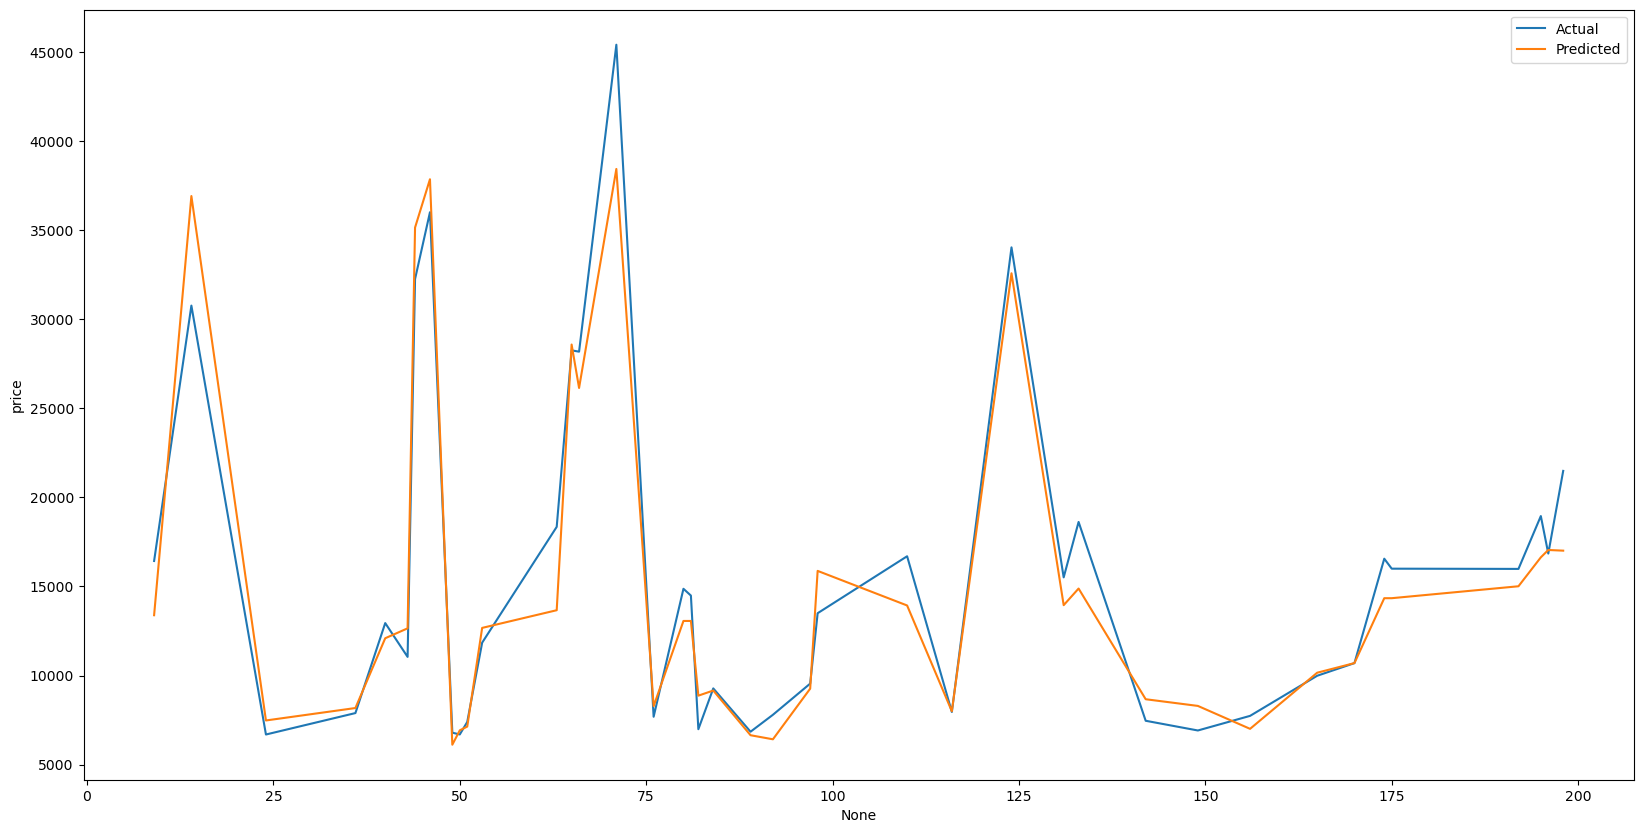

In [19]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")